In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd

df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/쿠팡 리뷰 분석/쿠팡 리뷰 데이터.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/쿠팡 리뷰 분석/SINGLE_20250129_211938.xlsx')

### 필요없는 칼럼 삭제

In [40]:
# 필요하지 않은 컬럼 리스트
columns_to_drop = ['LABEL-1', 'LABEL-2','LABEL-3', 'LABEL-4','LABEL-10','LABEL-11' ,'LABEL-12','LABEL-13', 'LABEL-14', 'LABEL-15',
                   'LABEL-16', 'LABEL-17', 'LABEL-18', 'Unnamed: 18','LABEL-19','LABEL-20', 'LABEL-21','LABEL-22']

# 불필요한 컬럼 삭제
df1 = df1.drop(columns=columns_to_drop, errors='ignore')
df2 = df2.drop(columns=columns_to_drop, errors='ignore')

### 결측치 확인

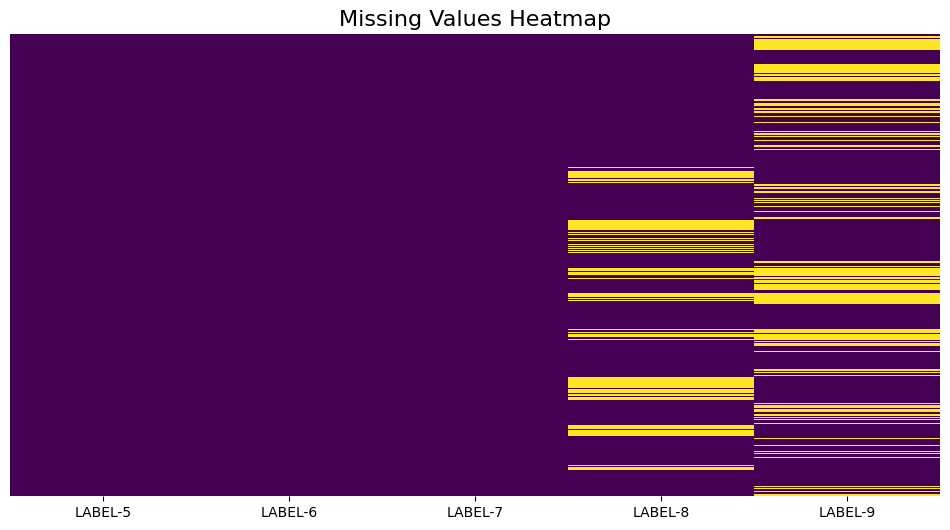

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 확인을 위한 히트맵
plt.figure(figsize=(12, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()



**LABEL-5**
- 작성자 닉네임. 작성자별 리뷰 패턴 분석이나 중복 확인에 사용 가능.

**LABEL-6**
- 리뷰 작성 날짜. 시점 기반 분석에 사용.

**LABEL-7**
- 리뷰 텍스트
- 신고

**LABEL-8**
- 리뷰 텍스트
- 추가 정보 (예: "한달사용", "재구매"). 리뷰의신뢰도를 높이거나 사용 패턴 분석에 활용 가능

**LABEL-9**
- 리뷰 텍스트. 키워드 추출 및 감정 분석의 핵심 데이터.

- 텍스트 리뷰와 사진 비디오 개수 여부의 칼럼에 결측치가 존재.

- 라벨7 에는 '신고' 라는 텍스트 또는 리뷰 텍스트가 있음

- 라벨 8에 한달사용 또는 재구매가 적혀있지 않으면 텍스트리뷰가 적혀있음

- 라벨 9는 한달사용또는 재구매를 한 사용자들의 텍스트 리뷰

### 결측치 처리

라벨 7에서 '신고' 포함된 행 삭제

라벨 8에서 '0' 포함된 행 삭제

라벨 9에서 'https://phinf.pstatic.net/checkout.phinf' 포함된 행 삭제

모든 라벨에서 '리뷰가 도움이 되었나요?' 포함된 행 삭제

정제된 라벨 7,8,9 데이터를 하나의 컬럼으로 통합

In [41]:
# 특정 텍스트 ('신고', '0', 특정 URL, '리뷰가 도움이 되었나요?')를 LABEL-7, LABEL-8, LABEL-9에서 삭제
for col in ['LABEL-7', 'LABEL-8', 'LABEL-9']:
    # '신고' 제거
    df1[col] = df1[col].str.replace('신고', '', regex=False)
    df2[col] = df2[col].str.replace('신고', '', regex=False)
    # '0' 제거
    df1[col] = df1[col].str.replace('0', '', regex=False)
    df2[col] = df2[col].str.replace('0', '', regex=False)
    # 특정 URL 제거
    df1[col] = df1[col].str.replace('https://phinf.pstatic.net/checkout.phinf', '', regex=False)
    df2[col] = df2[col].str.replace('https://phinf.pstatic.net/checkout.phinf', '', regex=False)
    # '리뷰가 도움이 되었나요?' 제거
    df1[col] = df1[col].str.replace('리뷰가 도움이 되었나요?', '', regex=False)
    df2[col] = df2[col].str.replace('리뷰가 도움이 되었나요?', '', regex=False)

# 특정 텍스트 ('한달사용', '재구매')를 LABEL-7, LABEL-8, LABEL-9에서 삭제
for col in ['LABEL-7', 'LABEL-8', 'LABEL-9']:
    df1[col] = df1[col].str.replace('한달사용', '', regex=False)
    df1[col] = df1[col].str.replace('재구매', '', regex=False)
    df2[col] = df2[col].str.replace('한달사용', '', regex=False)
    df2[col] = df2[col].str.replace('재구매', '', regex=False)

In [42]:
# LABEL-7, LABEL-8, LABEL-9 컬럼 합치기
df1['리뷰'] = df1[['LABEL-7', 'LABEL-8', 'LABEL-9']].fillna('').apply(lambda x: ' '.join(x), axis=1)
df2['리뷰'] = df2[['LABEL-7', 'LABEL-8', 'LABEL-9']].fillna('').apply(lambda x: ' '.join(x), axis=1)

In [43]:
# LABEL-7, LABEL-8, LABEL-9 컬럼 제거
df1 = df1.drop(columns=['LABEL-7', 'LABEL-8', 'LABEL-9'], errors='ignore')
df2 = df2.drop(columns=['LABEL-7', 'LABEL-8', 'LABEL-9'], errors='ignore')

### 라벨 5 와 6의 날짜만 추출

In [44]:
# 날짜 포맷 확인 및 날짜만 남기기
import numpy as np

#새로운 칼럼 date 생성
df1['날짜'] = np.where(
    df1['LABEL-5'].str.contains(r'\d{2}\.\d{2}\.\d{2}', na=False),# LABEL-5에 날짜가 있는 경우
    df1['LABEL-5'],  # LABEL-5 값을 사용
    df1['LABEL-6']   # 그렇지 않으면 LABEL-6 값을 사용
)

df1 = df1.drop(columns=['LABEL-5', 'LABEL-6'], errors='ignore')

#새로운 칼럼 date 생성
df2['날짜'] = np.where(
    df2['LABEL-5'].str.contains(r'\d{2}\.\d{2}\.\d{2}', na=False),# LABEL-5에 날짜가 있는 경우
    df2['LABEL-5'],  # LABEL-5 값을 사용
    df2['LABEL-6']   # 그렇지 않으면 LABEL-6 값을 사용
)

df2 = df2.drop(columns=['LABEL-5', 'LABEL-6'], errors='ignore')

### 데이터 타입 전처리

In [ ]:
print(df1.dtypes)

리뷰    object
날짜    object
dtype: object


In [45]:
# 날짜 타입 변환
df1['날짜'] = pd.to_datetime(df1['날짜'], format='%y.%m.%d.', errors='coerce')
df2['날짜'] = pd.to_datetime(df2['날짜'], format='%y.%m.%d.', errors='coerce')

### 리뷰 텍스트 전처리

In [46]:
#불필요한 공백 제거
df1['리뷰'] = df1['리뷰'].str.strip()

# 특수문자 제거
df1['리뷰']=df1['리뷰'].str.replace(r'[^a-zA-Z가-힣0-9\s]', '', regex=True)
df1['리뷰']=df1['리뷰'].str.replace(r'[\n]', '', regex=True)

#불필요한 공백 제거
df2['리뷰'] = df2['리뷰'].str.strip()

# 특수문자 제거
df2['리뷰']=df2['리뷰'].str.replace(r'[^a-zA-Z가-힣0-9\s]', '', regex=True)
df2['리뷰']=df2['리뷰'].str.replace(r'[\n]', '', regex=True)

In [47]:
#결측치 확인
print(df1['리뷰'].isnull().sum())

reviews1 = df1['리뷰']
reviews2 = df2['리뷰']

0


In [48]:
import re
from nltk.tokenize import word_tokenize
import nltk

# punkt_tab 데이터 다운로드
nltk.download('punkt_tab')

# 한국어와 영어 단어를 분리하는 함수
def tokenize_review(text):
    # 특수문자 제거 및 단어 단위로 분리
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    return word_tokenize(text)

# 토큰화 함수 실행
df1['리뷰'] = reviews1.apply(tokenize_review)
df2['리뷰'] = reviews2.apply(tokenize_review)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [49]:
df2

,리뷰,날짜
0,"[단자가, 불량인듯합니다, 224828123172481738413Br6O3JPEG1...",2024-08-28
1,"[제품, 받았으나, 픽셀, 불량으로, 서비스센터, 직접, 다녀와야, 했습니다, 불량...",2024-08-19
2,"[배송지연으로, 진짜, 열받았습니다, 제품은, 조아모, 224521661716177...",2024-05-20
3,"[화면에, 불량화소, 암점이, 한개, 있는데, 5개, 이상만, as대상이라, 그냥,...",2024-02-03
4,"[모니터, 상단부분, 단차가, 커서, 베젤, 내부, 본드, 자국인지, 훤히, 다, ...",2024-06-21
5,"[리뷰가, 좋아서, 샀는데, 실망입니다뽑기, 잘, 못해서, 흑점, 3개, 있는건, ...",2024-04-08
6,"[사무실용으로, 산건데, 괜찮아요]",2025-01-26
7,[],2024-10-10
8,[22492393172765823732HKYcRJPEGScreenshot224923...,2024-09-23
9,[22499239172584692358MyEvBJPEGimagejpgtypef33],2024-09-09


In [50]:
# 저장 경로 설정
data_path = '/content/drive/MyDrive/Colab Notebooks/쿠팡 리뷰 분석/data_processed.csv'

# 데이터 저장
df1.to_csv(data_path, index=False)